# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [26]:
import numpy
from matplotlib import pyplot as plt 


To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [34]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
        
    def doSteps(self,n):
        positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        # YOUR CODE HERE
        positions[0]=self.pos
        for i in range(1,n+1):
            istep = numpy.random.choice(range(self.npossible))
            positions[i]=positions[i-1]+self.possibleSteps[istep]
        #x,y=positions.T
        #print(x**2+y**2)
        #print(positions.T ) 
    
        return positions

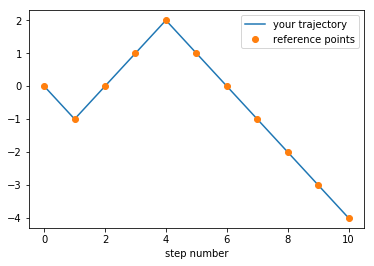

In [35]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

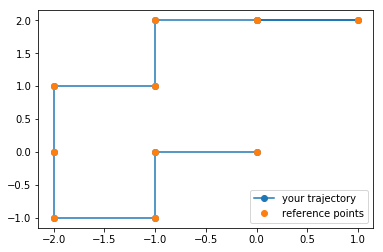

In [36]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

4.0
[[2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]
 [2.  0.1]]


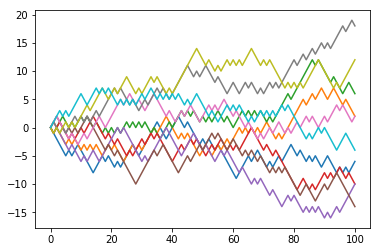

In [37]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)
    
    
    
a = numpy.zeros((10, 2))
a[:, 0] = 2.0
a[:, 1] = 0.1
y=numpy.mean(a)
z=numpy.mean(a[:,0]**2)
print(z)
print(a)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


[0.0, 1.0, 1.72, 2.68, 3.44, 4.44, 5.92, 7.16, 7.84, 9.08, 11.0, 11.56, 12.64, 14.44, 15.44, 17.56, 20.12, 20.2, 22.12, 23.88, 23.6, 24.6, 24.84, 23.72, 25.2, 27.16, 28.6, 30.68, 31.84, 33.72, 33.96, 36.36, 35.6, 36.84, 37.92, 39.24, 39.64, 40.44, 40.76, 41.88, 42.96, 43.48, 44.6, 50.28, 51.52, 49.96, 53.56, 55.8, 60.68, 63.24, 64.6, 69.4, 67.2, 67.96, 69.84, 70.68, 71.92, 71.48, 73.92, 73.48, 74.28, 73.24, 75.36, 73.72, 72.84, 74.6, 75.24, 75.4, 77.48, 81.0, 84.2, 78.44, 77.84, 80.04, 81.96, 82.6, 84.76, 87.8, 89.08, 86.76, 85.92, 87.4, 87.68, 87.8, 90.8, 93.0, 95.0, 96.68, 95.12, 95.88, 96.48, 98.36, 99.36, 102.36, 103.44, 103.56, 104.36, 105.56, 106.52, 106.6, 108.16, 110.68, 107.84, 105.08, 106.08, 107.0, 106.6, 106.04, 107.04, 106.76, 109.2, 112.68, 110.64, 109.96, 110.52, 109.16, 113.56, 115.4, 118.64, 122.36, 121.84, 121.8, 122.28, 121.56, 126.32, 127.72, 129.28, 128.2, 128.44, 127.24, 128.76, 131.72, 131.76, 129.24, 127.2, 129.88, 134.52, 134.6, 133.8, 136.36, 133.44, 135.8, 13

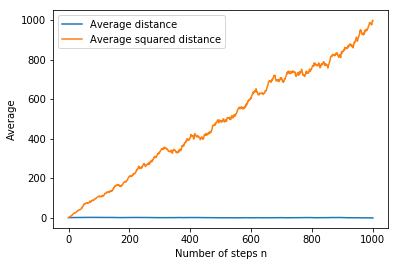

In [47]:
nsteps = 1000
ndim = 1
nwalkers = 100

w = walker(numpy.zeros(ndim),ndim)

steps=numpy.arange(0,nsteps+1,1)

all_positions=numpy.empty([nwalkers,nsteps+1])
x_av=[]
x2_av=[]
for i in range(nwalkers):
    all_positions[i:,]=w.doSteps(nsteps).T
for k in range(nsteps+1):
    x_av.append(numpy.mean(all_positions[:,k]))
    x2_av.append(numpy.average(all_positions[:,k]**2))

plt.plot(steps,x_av)
plt.plot(steps,x2_av)
plt.xlabel('Number of steps n')
plt.ylabel('Average')
plt.legend(["Average distance","Average squared distance"])
print(x2_av)

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


In [50]:
nsteps = 100
nwalkers = 400
dimensions = range(1,5)
steps=numpy.arange(0,nsteps+1,1)

#Code that generates values for 1 dimension
w = walker(numpy.zeros(1),ndim=1)
all_positions=numpy.empty([nwalkers,nsteps+1])
x1_av=[]
for m in range(0,400):
    x=w.doSteps(nsteps).T
    t=x**2
    all_positions[m,:]=t
for s in range(nsteps+1):
    x1_av.append(numpy.average(all_positions[:,s]))

print(x1_av)
#Code that generates values for 2 dimensions
w = walker(numpy.zeros(2),ndim=2)
all_positions=numpy.empty([nwalkers,nsteps+1])
x2_av=[]
for m in range(0,400):
    x,y=w.doSteps(nsteps).T
    t=x**2+y**2
    all_positions[m,:]=t
for s in range(nsteps+1):
    x2_av.append(numpy.average(all_positions[:,s]))

#Code that generates values for 3 dimensions
w = walker(numpy.zeros(3),ndim=3)
all_positions=numpy.empty([nwalkers,nsteps+1])
x3_av=[]
for m in range(0,400):
    x,y,z=w.doSteps(nsteps).T
    t=x**2+y**2+z**2
    all_positions[m,:]=t
for s in range(nsteps+1):
    x3_av.append(numpy.average(all_positions[:,s]))
    
#Code thatgenerates values for 4 dimensions
w = walker(numpy.zeros(4),ndim=4)
all_positions=numpy.empty([nwalkers,nsteps+1])
x4_av=[]
for m in range(0,400):
    x,y,z,a=w.doSteps(nsteps).T
    t=x**2+y**2+z**2+a**2
    all_positions[m,:]=t
for s in range(nsteps+1):
    x4_av.append(numpy.average(all_positions[:,s]))


#for j in range(1,5):
    #w = walker(numpy.zeros(j),ndim=j)
    #all_positions=numpy.empty([nwalkers,nsteps+1])
    #x2_av=[]
    #for i in range(nwalkers):
        #print((w.doSteps(nsteps).T))
        #print(all_positions[1:,])
        
        #for k in range(nsteps+1):
            #all_positions[w.doSteps(nsteps).T[:,k]
            #x_av.append(numpy.mean(all_positions[:,k]))
            #x2_av.append(numpy.average(w.doSteps(nsteps).T[:,k]))
        

[0.0, 1.0, 1.93, 2.9, 3.77, 4.62, 5.24, 6.16, 6.99, 8.02, 8.87, 9.66, 10.58, 11.82, 12.98, 14.6, 16.32, 17.52, 18.59, 19.64, 20.34, 21.42, 22.64, 23.2, 24.96, 26.8, 28.18, 28.84, 30.03, 30.12, 31.05, 31.62, 33.33, 33.88, 34.59, 35.86, 36.81, 38.26, 39.31, 39.84, 40.75, 42.3, 43.55, 44.46, 45.24, 46.82, 47.42, 48.92, 50.86, 51.48, 52.44, 53.44, 54.21, 55.6, 57.28, 58.26, 59.58, 59.78, 61.17, 63.06, 63.3, 63.62, 65.19, 65.84, 65.97, 66.72, 68.52, 68.56, 68.78, 70.02, 71.09, 72.96, 73.47, 75.32, 75.65, 78.2, 77.72, 79.62, 81.49, 82.04, 84.52, 84.52, 84.26, 86.04, 86.47, 86.16, 87.86, 88.42, 89.93, 89.62, 88.43, 87.82, 89.92, 89.1, 89.49, 90.92, 93.67, 95.04, 95.03, 96.14, 98.32]


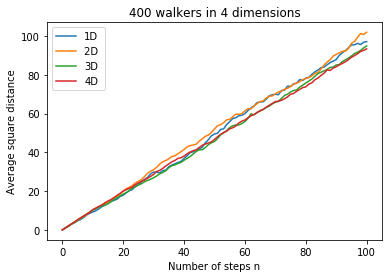

In [49]:
plt.plot(steps,x1_av)
plt.plot(steps,x2_av)
plt.plot(steps,x3_av)
plt.plot(steps,x4_av)
plt.title('400 walkers in 4 dimensions')
plt.xlabel('Number of steps n')
plt.ylabel('Average square distance')
plt.legend(["1D","2D ","3D",'4D'])

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


0 10
0 10
1 100
1 100
2 500
2 500


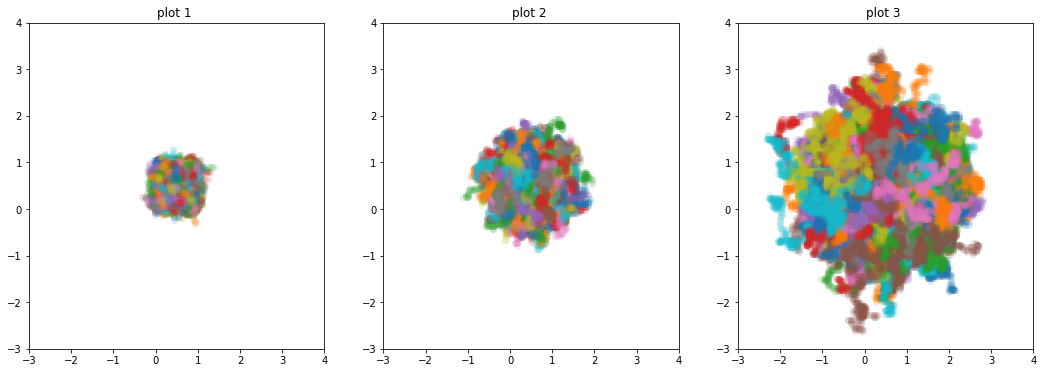

In [51]:
ndim=2
nwalkers=1000

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))


# this code is a template to create 3 subplots in one, adapt it to your task!
plt.figure(figsize=(18,6))

for i, nsteps in enumerate([10,100,500]):
    plt.subplot(131+i)
    plt.xlim((-3, 4))
    plt.ylim((-3, 4))
    plt.title("plot {} ".format(i+1))    
    plt.scatter(rand_pos[:,0], rand_pos[:,1], alpha=0.13)
    print(i,nsteps)
    
    all_positions=numpy.zeros((2*nwalkers,nsteps+1))
    pos=numpy.empty((nwalkers,ndim))
    for m in range(nwalkers):
        starting_point=numpy.array([rand_pos[m,0],rand_pos[m,1]])
        w = walker(starting_point,ndim,step_size=0.05)
    
        x,y=(w.doSteps(nsteps).T)
        all_positions[2*m,:]=x
        all_positions[2*m+1,:]=y
        
    for s in range(nwalkers):
        plt.scatter(all_positions[2*s,:],all_positions[(2*s)+1,:],alpha=0.13)
    print(i,nsteps)

